# Small Assignment 1
(due September 9th 2022, 11:59 PM PDT)

This assignment will help you get familiar with using **R** to manipulate data. We have included comments in the code cells to help outline the required steps. We will not provide such comments in the future, but we encourage you to develop a habit of annotating your code in a similar way, so that another reader (perhaps yourself in the future!) can easily follow what you are doing.

If you have questions about using particular functions in **R**, remember that entering `?function` or `help(function)` will pull up a window outlining the syntax for the function and how the arguments should be entered.

Please submit this assignment via Gradescope. To do so you will need to generate a single pdf
file of your answers. For small assignments, the pdf can be composed of photo images and/or
screenshots if you are not using Jupyter. Please see the [submission instructions](https://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf) for help uploading to Gradescope. 

## Part 1. 
We are going to explore the nuts and bolts of regressions by doing one by hand. *Please do not use canned functions to calculate sample variances and covariances and to estimate regression coefficients.*

Start by reading in the `energy.csv` file.

In [1]:
# Read in the data and save it as an object
## Step 1 read --> there are different ways of reading in a file for example dta file is read_dta and csv is read.csv
#read.csv("energy.csv")
## step 2 save it as an object --> Do this so you can access it later with just the name (object)
energy <- read.csv ("energy.csv")
head(energy)

,country_name,country_code,energy_use,pop,gdp
,<chr>,<chr>,<dbl>,<int>,<dbl>
1,Albania,ALB,8480.065,2837743,1.515643e+10
2,Algeria,DZA,12958.346,43851043,1.749110e+11
3,Angola,AGO,6058.792,32866268,7.779294e+10
4,Argentina,ARG,22430.227,45376763,5.248200e+11
5,Australia,AUS,67373.945,25687041,1.428530e+12
6,Austria,AUT,47115.410,8917205,4.551680e+11


View the structure of the dataset using the `head` function.

In [2]:
# View first few lines of data
head(energy)

,country_name,country_code,energy_use,pop,gdp
,<chr>,<chr>,<dbl>,<int>,<dbl>
1,Albania,ALB,8480.065,2837743,1.515643e+10
2,Algeria,DZA,12958.346,43851043,1.749110e+11
3,Angola,AGO,6058.792,32866268,7.779294e+10
4,Argentina,ARG,22430.227,45376763,5.248200e+11
5,Australia,AUS,67373.945,25687041,1.428530e+12
6,Austria,AUT,47115.410,8917205,4.551680e+11


**(a)** Create two new variables, GDP (\$) per capita and energy use (KT oil equivalent) per capita.

*Hint: Use the* `mutate` *function (you will have to load* `tidyverse` *first).* 


In [10]:
# Load tidyverse
library(tidyverse)
# Generate per capita variables
gdp_energy <- mutate(energy,gdp_per_capita = energy$gdp / energy$pop)
both_energy <- mutate(gdp_energy, energy_per_capita = energy$energy_use / energy$pop)
head(both_energy)

,country_name,country_code,energy_use,pop,gdp,gdp_per_capita,energy_per_capita
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Albania,ALB,8480.065,2837743,1.515643e+10,5341.017,0.0029883134
2,Algeria,DZA,12958.346,43851043,1.749110e+11,3988.753,0.0002955083
3,Angola,AGO,6058.792,32866268,7.779294e+10,2366.954,0.0001843468
4,Argentina,ARG,22430.227,45376763,5.248200e+11,11565.832,0.0004943109
5,Australia,AUS,67373.945,25687041,1.428530e+12,55612.867,0.0026228768
6,Austria,AUT,47115.410,8917205,4.551680e+11,51043.797,0.0052836522


**(b)** Generate a scatter plot comparing energy use per capita (on the y-axis) to GDP per capita (on the x-axis) for the countries in your sample. *Hint: Use the* `plot` *function.*

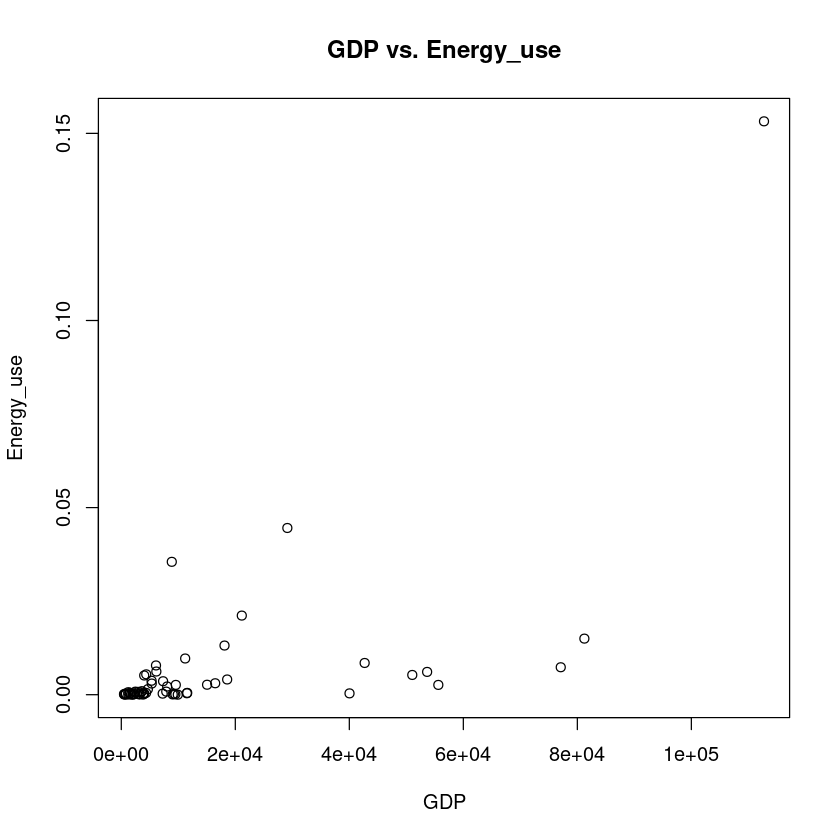

In [4]:
# Simple scatterplot
plot(both_energy$gdp_per_capita, both_energy$energy_per_capita, # x-axis first, y-axis second
    main = "GDP vs. Energy_use",
    xlab = "GDP",
    ylab = "Energy_use") # don't forget the last parenthesis!

**(c)** Calculate the sample mean of GDP per capita, sample mean of energy per capita,
covariance of GDP per capita and energy use per capita, and variance of GDP per
capita.

*Hint: The functions `sum()` and `nrow()` will be useful. Create a vector by writing `c(object1, object2, object3,...)`.

In [5]:
# Save means as new objects
gdp_mean = (sum(both_energy$gdp_per_capita)/nrow(both_energy))
energy_mean = (sum(both_energy$energy_per_capita)/nrow(both_energy)) 

# Create new columns with residuals (x_i-\bar{x}) and (y_i-\bar{y}) as part of your data 
both_energy2 <- mutate(both_energy, residual_energy = both_energy$energy_per_capita - energy_mean)
both_energy3 <- mutate(both_energy2, residual_gdp = both_energy2$gdp_per_capita - gdp_mean)

# Create new columns with the elements you need to calculate the covariance and variance, based on the residuals
both_energy4 <- mutate(both_energy3, x1 = both_energy3$residual_gdp)
both_energy5 <- mutate(both_energy4, y1 = both_energy3$residual_energy)
head(both_energy5)
x1 = both_energy3$residual_gdp
y1 = both_energy3$residual_energy
#resi_corvaince = sum(both_energy5&x1)
resi_corvaince = sum((x1)*(y1))/ (nrow(both_energy)-1)
resi_variance_x1 = sum((x1)^2)/(nrow(both_energy)-1)
resi_variance_y1 = sum((y1)^2)/(nrow(both_energy)-1)

# Save the covariance and variance as new objects by summing over the relevant variables and dividing by n-1.
x = both_energy3$gdp_per_capita
y = both_energy3$energy_per_capita
covariance_var = sum((x - gdp_mean)*(y - energy_mean))/ (nrow(both_energy)-1)
variance_var_x = sum((x-gdp_mean)^2)/(nrow(both_energy)-1)
variance_var_y = sum((y-energy_mean)^2)/(nrow(both_energy)-1)

# Display results, using a vector with four elements ### GDP per capita only
c(gdp_mean,energy_mean,variance_var_x,covariance_var)

,country_name,country_code,energy_use,pop,gdp,gdp_per_capita,energy_per_capita,residual_energy,residual_gdp,x1,y1
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,ALB,8480.065,2837743,1.515643e+10,5341.017,0.0029883134,-0.003417004,-8824.103,-8824.103,-0.003417004
2,Algeria,DZA,12958.346,43851043,1.749110e+11,3988.753,0.0002955083,-0.006109809,-10176.366,-10176.366,-0.006109809
3,Angola,AGO,6058.792,32866268,7.779294e+10,2366.954,0.0001843468,-0.006220970,-11798.166,-11798.166,-0.006220970
4,Argentina,ARG,22430.227,45376763,5.248200e+11,11565.832,0.0004943109,-0.005911006,-2599.288,-2599.288,-0.005911006
5,Australia,AUS,67373.945,25687041,1.428530e+12,55612.867,0.0026228768,-0.003782440,41447.747,41447.747,-0.003782440
6,Austria,AUT,47115.410,8917205,4.551680e+11,51043.797,0.0052836522,-0.001121665,36878.677,36878.677,-0.001121665


[1] 1.416512e+04 6.405317e-03 4.948874e+08 2.981685e+02

**(d)** Suppose $y_i$ is energy use per capita in country $i$ and $x_i$ is GDP per capita in country $i$. Suppose your statistical model is $$y_i=\beta_0+\beta_1x_i+u_i.$$ Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ using your results in part **(c)**. 

In [7]:
# Solve for \hat\beta_1 and \hat\beta_0 and save these objects
beta1 = covariance_var/variance_var_x
beta0 = energy_mean - beta1*(gdp_mean)
# Display results as a vector
beta_results <- c(beta0,beta1)
beta_results

[1] -2.129134e-03  6.024976e-07

**(e)** Plot a line which indicates the predictions from your estimated model, $$\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i.$$ *Hint: use the* `curve` and `points` *functions.*

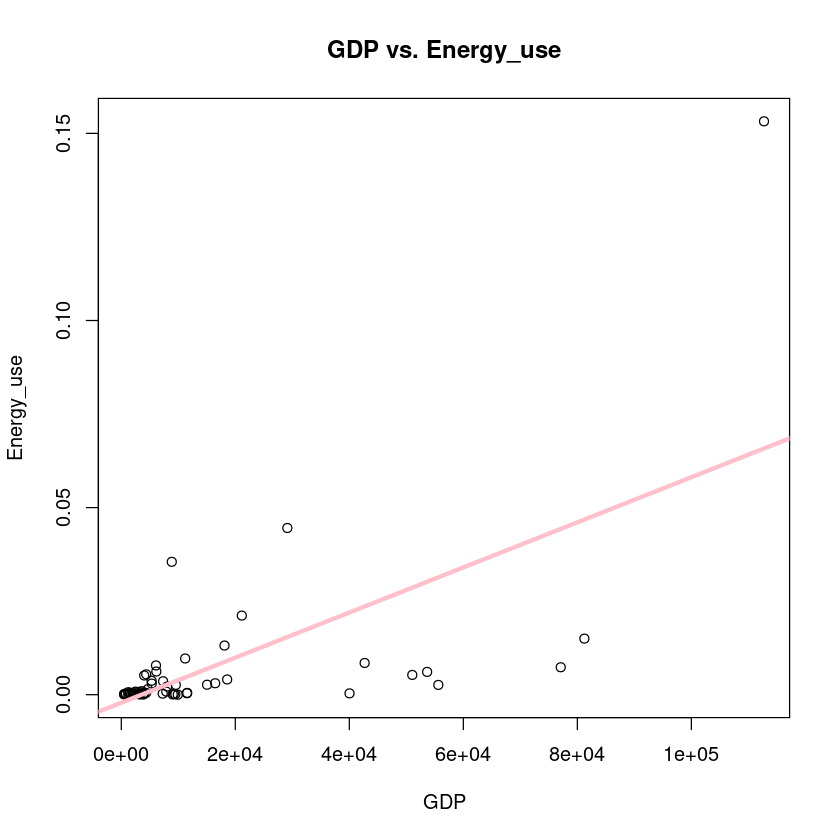

In [8]:
# Overlay with data points
plot(both_energy$gdp_per_capita, both_energy$energy_per_capita, # x-axis first, y-axis second
    main = "GDP vs. Energy_use",
    xlab = "GDP",
    ylab = "Energy_use")
# Plot the line
abline(beta0,beta1,col = 'pink',lwd = 3.5)

**(f)** Interpret your estimates $\hat{\beta}_0$ and $\hat{\beta}_1$.

Some inrcease in GDP, will increase in energy. Since its a positive slope, this means increase in GDP is an increase in energy usage. Beta0 is meaningless, its because the low are to low and the high one is too high for the predicted model to predict them. One, you don't have enough data for the bottom to estimate it correctly.  

## Part 2.
Suppose you estimate a weekly wage equation which suggests 

$$ \log(wage_i)= 4.54 + .056*Ed_i+u_i$$ 

where $Ed_i$ is the number of years of education completed by person $i$. 

**(a)** Predict the wage for a person with 12 years of education (that is a person who completes high school).

In [9]:
exp(4.54 + .056*(12)) 
## The predicted wage for a person with 12 year of education is $183.46 weekly wage

[1] 183.4606

**(b)** Interpret your estimated $\beta_1=$0.056.

Sign: From the sign the model of beta1 predicts increase in education is increase in wage. The rate of increase of education, the wage will increase by 0.056. In this model the current change is 5.6% of each year of education that you attain.

Size: If the size of this variable to increase, this would increase wage by that much. Yes, this would have economically effect, because its 5.6% increase of wage every year of education, which is a lot in term of economics. 